#### IMPORTING NECESSARY LIBARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_df1 = pd.read_csv('Unemployment in India.csv')
data_df2 = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

In [5]:
data_df1.head(4)


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural


In [7]:
data_df1.shape

(768, 7)

### The first Dataset has 768rows and 7columns

In [11]:
data_df2.head(4)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74


In [13]:
data_df2.shape

(267, 9)

### The second dataset has 267rows and 9columns 

#### HANDLING THE FIRST DATASET

In [15]:
data_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


## HERE COMES THE DATA CLEANING

In [17]:
data_df1.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [19]:
# Removing missing values
data_df1 = data_df1.dropna()

In [21]:
data_df1.shape

(740, 7)

In [23]:
data_df1.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

##### what i noticed here is that there is white space and we need to get ride of it by renaming those columns

In [25]:
data_df1.columns = ['Region','Date','Frequency','Unemployment_Rate','Employed_Rate',
                    'Labour_Participation_Rate','Area']

In [27]:
data_df1.columns

Index(['Region', 'Date', 'Frequency', 'Unemployment_Rate', 'Employed_Rate',
       'Labour_Participation_Rate', 'Area'],
      dtype='object')

#### there is 28null values and i here by get rid of them

In [29]:
data_df1['Date'] = pd.to_datetime(data_df1['Date'],format='mixed',dayfirst=False)

In [31]:
data_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Region                     740 non-null    object        
 1   Date                       740 non-null    datetime64[ns]
 2   Frequency                  740 non-null    object        
 3   Unemployment_Rate          740 non-null    float64       
 4   Employed_Rate              740 non-null    float64       
 5   Labour_Participation_Rate  740 non-null    float64       
 6   Area                       740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB


In [33]:
data_df1.describe()

,Date,Unemployment_Rate,Employed_Rate,Labour_Participation_Rate
count,740,740.000000,7.400000e+02,740.000000
mean,2019-12-12 18:36:58.378378496,11.787946,7.204460e+06,42.630122
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000
25%,2019-08-31 00:00:00,4.657500,1.190404e+06,38.062500
50%,2019-11-30 00:00:00,8.350000,4.744178e+06,41.160000
75%,2020-03-31 00:00:00,15.887500,1.127549e+07,45.505000
max,2020-06-30 00:00:00,76.740000,4.577751e+07,72.570000
std,NaN,10.721298,8.087988e+06,8.111094


In [35]:
data_df1['year'] = data_df1['Date'].dt.year

In [37]:
data_df1.head(3)

,Region,Date,Frequency,Unemployment_Rate,Employed_Rate,Labour_Participation_Rate,Area,year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,2019


In [41]:
data_df1['monthname'] = data_df1['Date'].dt.strftime('%b')
data_df1['days'] = data_df1['Date'].dt.day_name()

In [43]:
data_df1.head(2)

,Region,Date,Frequency,Unemployment_Rate,Employed_Rate,Labour_Participation_Rate,Area,year,monthname,days
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,2019,May,Friday
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,2019,Jun,Sunday


In [45]:
# UNEMPLOYMENT YEAR
UNEMPLOYMENT_YEAR = data_df1.groupby('year')['Unemployment_Rate'].sum()
print(UNEMPLOYMENT_YEAR.sort_values(ascending=False))

year
2020    4681.49
2019    4041.59
Name: Unemployment_Rate, dtype: float64


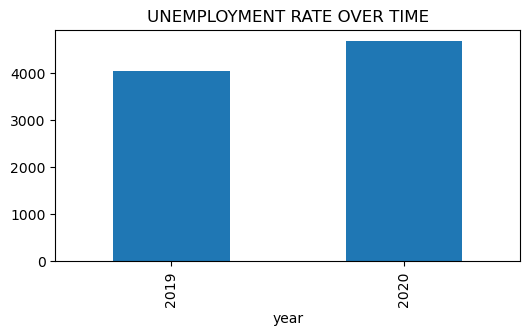

In [47]:
# VISUAL FOR UNEMPLOYMENT YEAR 
plt.figure(figsize=(6,3))
UNEMPLOYMENT_YEAR.plot(kind = 'bar')
plt.title('UNEMPLOYMENT RATE OVER TIME')
plt.show()

#### INSIGHTS
 - The insights here that the rate of unemployment in 2020 is higher than 2019. 
   - REASONS: The covid-19 pandemics affect the rate of employment in 2020.

In [49]:
# EMPLOYMENT YEAR
EMPLOYMENT_YEAR = data_df1.groupby('year')['Employed_Rate'].sum()
print(EMPLOYMENT_YEAR.sort_values(ascending=False))

year
2019    3.191880e+09
2020    2.139421e+09
Name: Employed_Rate, dtype: float64


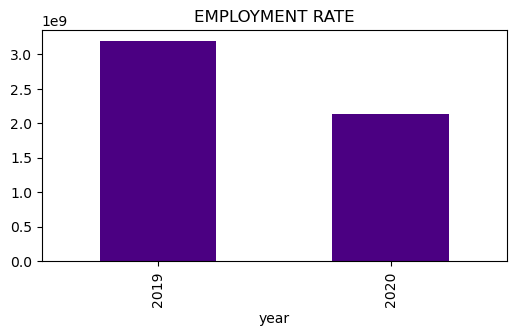

In [51]:
# VISUAL FOR EMPLOYMENT OVER TIME
plt.figure(figsize=(6,3))
EMPLOYMENT_YEAR.plot(kind = 'bar',color='indigo')
plt.title('EMPLOYMENT RATE')
plt.show()

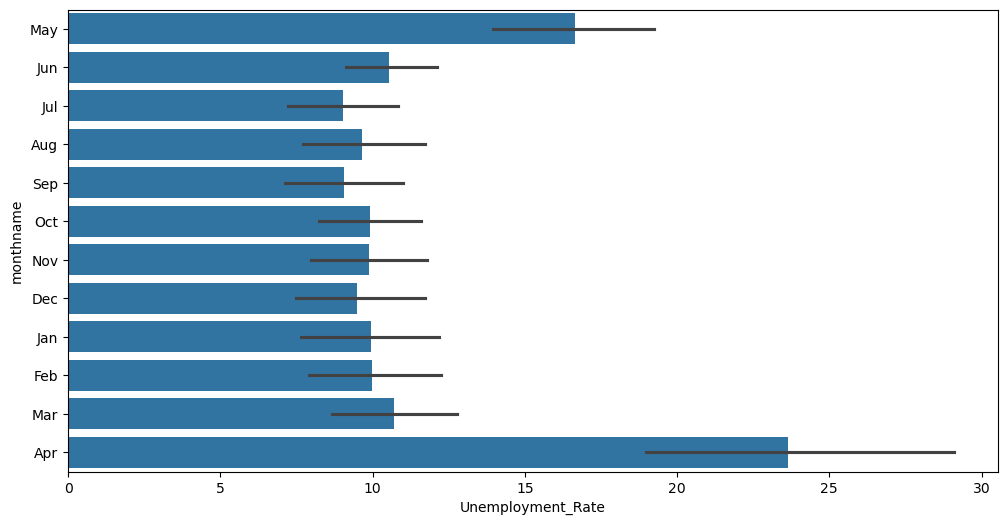

In [53]:
plt.figure(figsize=(12,6))
sns.barplot(y='monthname', x = 'Unemployment_Rate',data = data_df1)
plt.show()

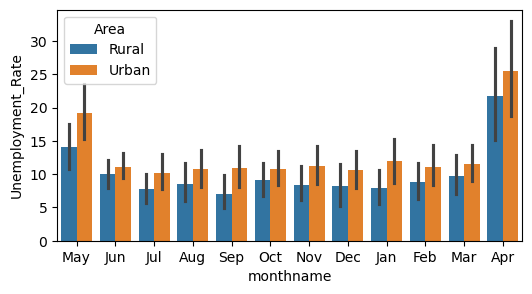

In [55]:
plt.figure(figsize=(6,3))
sns.barplot(y='Unemployment_Rate', x = 'monthname',hue= 'Area',data = data_df1)
plt.show()

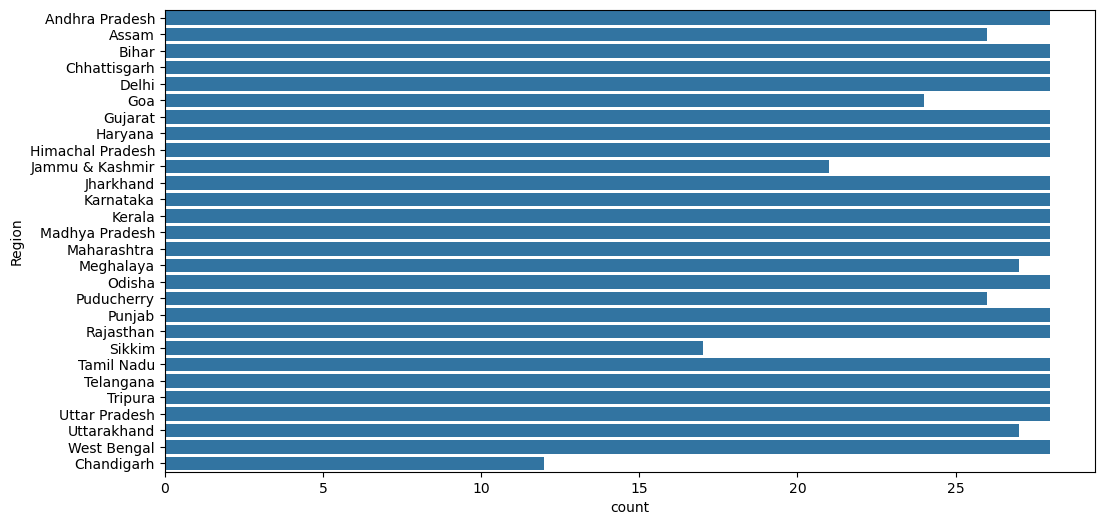

In [57]:
plt.figure(figsize=(12,6))
sns.countplot(y='Region', data = data_df1)
plt.show()

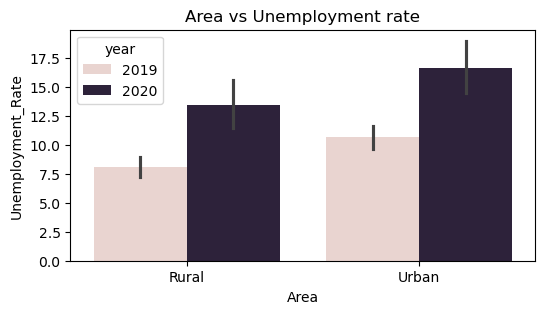

In [61]:
plt.figure(figsize=(6,3))
sns.barplot(x='Area', y='Unemployment_Rate', data=data_df1, hue='year')
plt.title("Area vs Unemployment rate")
plt.show()

#### INSIGHTS
    - The rate of unemployment in year 2020 increases in both Rural and Urban area compared to year 2019.
      -REASONS: COVID-19 pandemics affect both RURAL and URBAN AREA

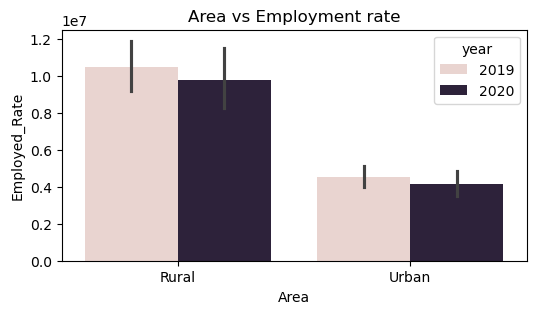

In [63]:
plt.figure(figsize=(6,3))
sns.barplot(x='Area', y='Employed_Rate', data=data_df1, hue='year')
plt.title("Area vs Employment rate")
plt.show()

#### INSIGHTS
- The rate of employment in Rural area increases in both year 2019 and 2020 while the rate of employment in Urban decrease in both year

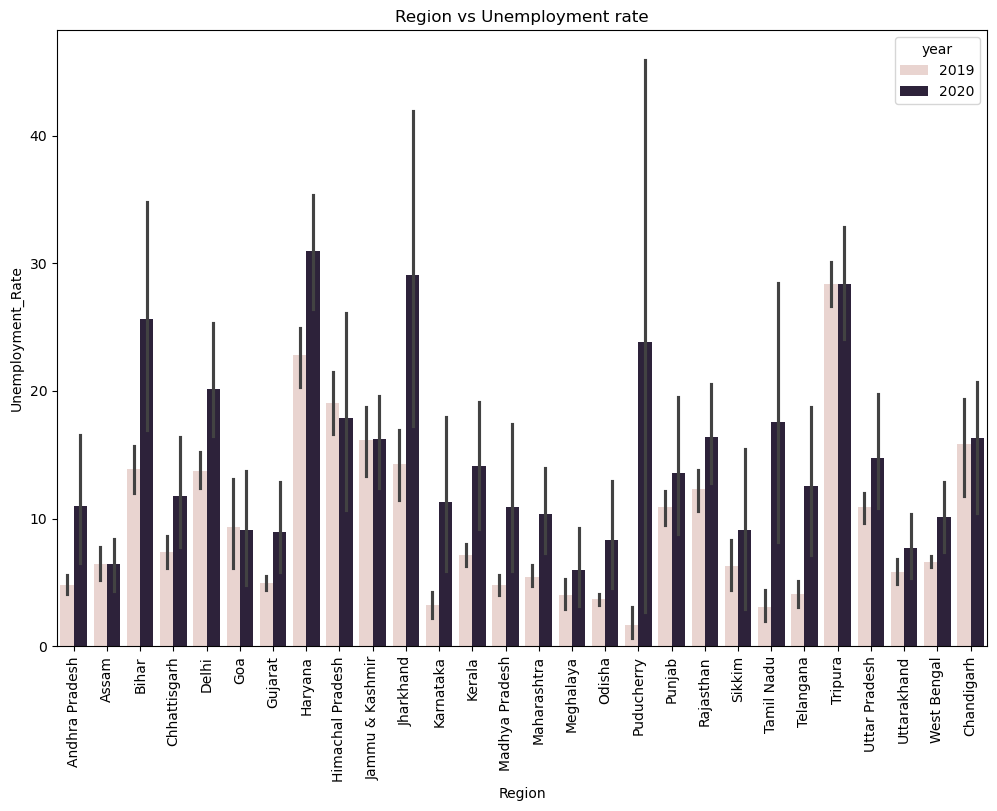

In [65]:
plt.figure(figsize=(12,8))
sns.barplot(x='Region', y='Unemployment_Rate', data=data_df1, hue='year')
plt.title("Region vs Unemployment rate")
plt.xticks(rotation=90)
plt.show()

#### INSIGHTS
- The rate of unemployment across all regions increases in the year 2020 compared to that of year 2019.
- REASON: COVID-19 affects all regions in India

In [67]:
import plotly.express as px

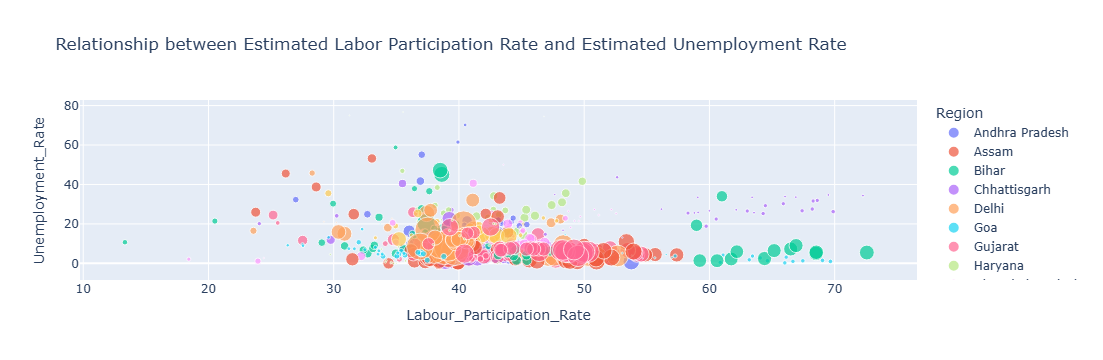

In [72]:
fig = px.scatter(data_df1, x='Labour_Participation_Rate',
                 y='Unemployment_Rate', 
                 color='Region', 
                 size='Employed_Rate', 
                 hover_data=['Area'],
                 title='Relationship between Estimated Labor Participation Rate and Estimated Unemployment Rate')
fig.show()

In [75]:
data_df1['Labour_Participation_Rate'].value_counts()

Labour_Participation_Rate
40.43    3
42.82    3
39.92    3
43.25    3
39.04    3
        ..
44.08    1
46.50    1
45.79    1
44.79    1
40.67    1
Name: count, Length: 626, dtype: int64

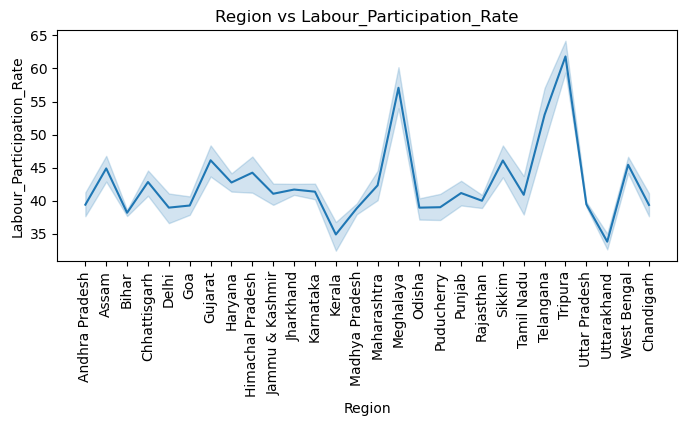

In [77]:
plt.figure(figsize=(8,3))
sns.lineplot(x='Region', y='Labour_Participation_Rate', data=data_df1,) #hue='year')
plt.title("Region vs Labour_Participation_Rate")
plt.xticks(rotation=90)
plt.show()

#### INSIGHTS
- Labour_Participation_Rate increases in MEGHALAYA and TRIPURA

In [79]:
data_df2.head(3)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74


In [81]:
data_df2.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

### Renaming those columns

In [83]:
data_df2.columns = ['Region', 'Date', 'Frequency','Unemployment_Rate','Employed_Rate',
                    'Labour_Participation_Rate','Region1','Longitude','Latitude']

In [85]:
data_df2.columns

Index(['Region', 'Date', 'Frequency', 'Unemployment_Rate', 'Employed_Rate',
       'Labour_Participation_Rate', 'Region1', 'Longitude', 'Latitude'],
      dtype='object')

In [87]:
data_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Region                     267 non-null    object 
 1   Date                       267 non-null    object 
 2   Frequency                  267 non-null    object 
 3   Unemployment_Rate          267 non-null    float64
 4   Employed_Rate              267 non-null    int64  
 5   Labour_Participation_Rate  267 non-null    float64
 6   Region1                    267 non-null    object 
 7   Longitude                  267 non-null    float64
 8   Latitude                   267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [89]:
data_df2.isnull().sum()

Region                       0
Date                         0
Frequency                    0
Unemployment_Rate            0
Employed_Rate                0
Labour_Participation_Rate    0
Region1                      0
Longitude                    0
Latitude                     0
dtype: int64

### NO NULL VALUES.  

In [91]:
data_df2['Date'] = pd.to_datetime(data_df2['Date'],format='mixed',dayfirst=False)

In [93]:
data_df2['year_2'] = data_df2['Date'].dt.year

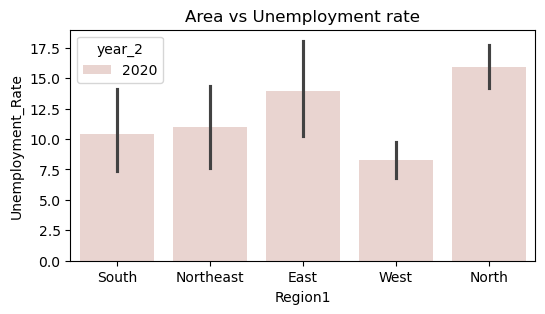

In [95]:
plt.figure(figsize=(6,3))
sns.barplot(x='Region1', y='Unemployment_Rate', data=data_df2,hue ='year_2')
plt.title("Area vs Unemployment rate")
plt.show()